In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv("advertising.csv")


In [5]:
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape


(200, 4)

In [9]:
df.columns


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


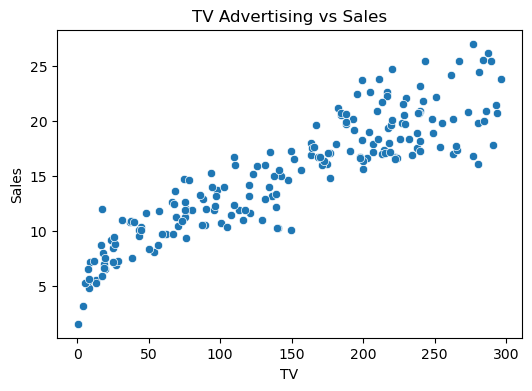

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs Sales')
plt.show()


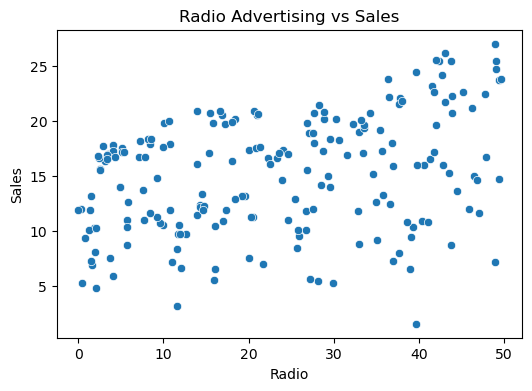

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs Sales')
plt.show()


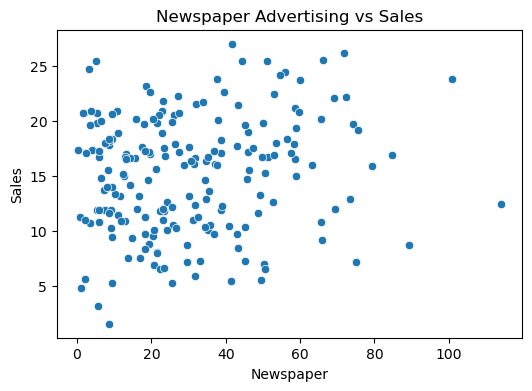

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs Sales')
plt.show()


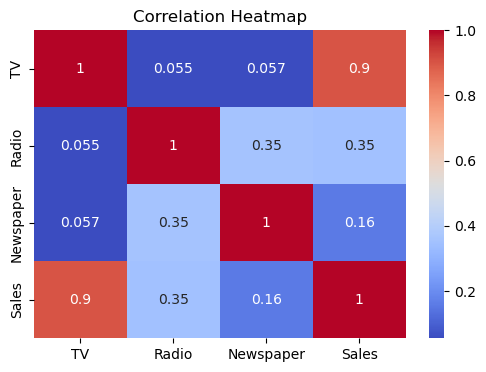

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [25]:
X = df[['TV', 'Radio', 'Newspaper']]   # Features
y = df['Sales']                       # Target


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
model = LinearRegression()


In [31]:
model.fit(X_train, y_train)


LinearRegression()

In [33]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
TV,0.054509
Radio,0.100945
Newspaper,0.004337


In [35]:
y_pred = model.predict(X_test)


In [37]:
mae = mean_absolute_error(y_test, y_pred)
mae


1.2748262109549338

In [39]:
mse = mean_squared_error(y_test, y_pred)
mse


2.9077569102710905

In [41]:
r2 = r2_score(y_test, y_pred)
r2


0.9059011844150826

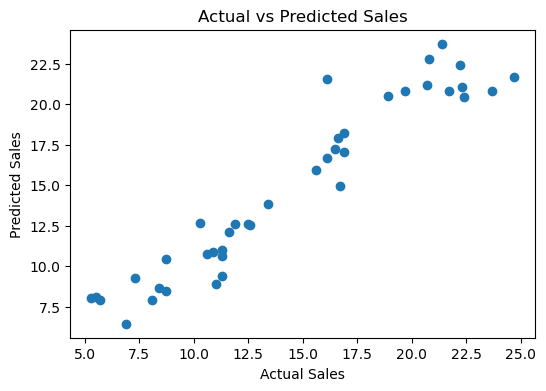

In [43]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [45]:
new_data = pd.DataFrame({
    'TV': [200],
    'Radio': [25],
    'Newspaper': [30]
})

predicted_sales = model.predict(new_data)
predicted_sales


array([18.26971403])